In [1]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve,RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# from scikitplot.metrics import plot_roc_curve

def display_conf_matrix(true_labels, pred_labels, pred_proba, classifier, savefile):
    
    # Display and Save Confusion Matrix:
    fig = plt.figure(figsize=(6,4), dpi=100)

    confusion_matrix1 = pd.crosstab(np.array(true_labels), 
                                   np.array(pred_labels),
                                   rownames=['Actual'], colnames=['Predicted'])
    confusion_matrix2 = pd.crosstab(np.array(true_labels), 
                                   np.array(pred_labels),
                                   rownames=['Actual'], colnames=['Predicted'], normalize='index')


    # Extracting counts and percentages from the matrices above:
    counts = ["{0:,}".format(value) for value in
                    confusion_matrix1.to_numpy().flatten()]

    percentages = ["{0:.2%}".format(value) for value in
                         confusion_matrix2.to_numpy().flatten()]

    # Combining counts and percentages as one label:
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(percentages, counts)]

    # Reshaping the labels to fit the array:
    labels = np.asarray(labels).reshape(2,2)

    #Plotting the heatmap:
    sns.heatmap(confusion_matrix2, annot=labels, fmt='', cmap='BuPu')
    plt.title("Confusion Matrix - %s\n" % classifier, fontweight='bold')
    plt.savefig(savefile, bbox_inches='tight')
    plt.show()

    # Calculating Metrics Using the Confusion Matrix:
    CM = confusion_matrix(true_labels, pred_labels, labels=[0, 1])

    TP = CM[1][1]
    FN = CM[1][0]
    FP = CM[0][1]
    TN = CM[0][0]

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    print(f"Sensitivity:     {TPR*100:.2f}%")
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    print(f"Specificity:     {TNR*100:.2f}%")
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print(f"Accuracy:        {ACC*100:.2f}%") 

    # f1 Score:
    F1 = TP/(TP + (0.5*(FP+FN)))
    print(f"F1 Score:        {F1*100:.2f}%") 

    MCC = ((TP*TN)-(FP*FN))/ (((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))**0.5)
    print(f"MCC:             {MCC*100:.2f}%") 
    
    auROC = roc_auc_score(true_labels, pred_proba)
    print(f"auROC:           {auROC*100:.2f}%") 
    
    metrics = [TPR*100, TNR*100, ACC*100, F1*100, MCC*100, auROC*100]

    return metrics



In [2]:
# !pip install scikit-learn
# !pip install seaborn
# !pip install scikitplot

In [ ]:
def convert_preds(preds):
    _,label=torch.max(preds,1)
    label=np.array(label)
    model_preds = np.concatenate(label, axis=0).tolist()
    df = pd.DataFrame({'pred_labels': model_preds})
    pred_labels = df.pred_labels
    return pred_labels

In [3]:
#load for PCLPAMP
def load_prefix_checkpoint(model,filename):
    # Loads dictionary
    checkpoint_filename = filename + "/checkpoint.pth"
    checkpoint = torch.load(checkpoint_filename)

    # Restore state for model and optimizer
    model.prefix_encoder.load_state_dict(checkpoint['model_prefix_state_dict'])
    model.classifier.load_state_dict(checkpoint['model_classifier_state_dict'])
    model.train() # always use TRAIN for resuming training   

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


total param is 689282


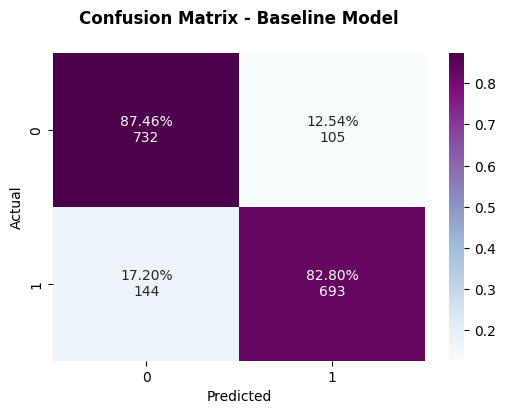

Sensitivity:     82.80%
Specificity:     87.46%
Accuracy:        85.13%
F1 Score:        84.77%
MCC:             70.33%
auROC:           90.58%


In [3]:
from new_model import ProtT5PrefixForSequenceClassification
from model_wo_prompt import ProtT5ForSequenceClassification
import torch
from torch.utils.data import DataLoader
from transformers import AutoConfig,T5Tokenizer
from dataset import PlantAMPDataset
import numpy as np
#different lambda
# loaded_path='../saved_model/Margin8.0_Contrasive_ProtT5_Prompt20_lambda0.3_acc0.9301'
# loaded_path="../saved_model/Margin8.0_Contrasive_ProtT5_Prompt20_lambda1.0_acc:0.9415"
# loaded_path="../saved_model/Margin8.0_Contrasive_ProtBert_Prompt20_acc:0.9241"
# loaded_path= "../saved_model/Margin8.0_Contrasive_ProtT5_Prompt20_acc:0.9307"
# loaded_path = "../saved_model/Margin8.0_Contrasive_ProtT5_Prompt20_lambda0.8_acc:"
# loaded_path = "../saved_model/Margin8.0_Contrasive_ProtT5_Prompt20_lambda0.5_acc:"
# loaded_path = "../saved_model/Margin8.0_Contrasive_ProtT5_Prompt20_lambda0.3_acc:"
# loaded_path = "../saved_model/Margin8.0_Contrasive_ProtT5_Prompt20_lambda0.0_acc:"

#different length
# loaded_path = "../saved_model/Margin8.0_Contrasive_ProtT5_Prompt10_lambda1.0_acc:"
# loaded_path="../saved_model/Margin8.0_Contrasive_ProtT5_Prompt50_lambda1.0_acc:"
# loaded_path = "../saved_model/Margin8.0_Contrasive_ProtT5_Prompt1_lambda1.0_acc:"
# loaded_path = "../saved_model/Margin8.0_Contrasive_ProtT5_Prompt5_lambda1.0_acc:"
# loaded_path = "../saved_model/Margin5.0_Contrasive_ProtT5_Prompt20_lambda1.0_acc:"
# loaded_path = "../saved_model/Margin3.0_Contrasive_ProtT5_Prompt20_lambda1.0_acc:"
# loaded_path = '../saved_model/Margin10.0_Contrasive_ProtT5_Prompt20_lambda1.0_acc:'
loaded_path = '../saved_model/Margin1.0_Contrasive_ProtT5_Prompt20_lambda1.0_acc:'

#baseline
# loaded_path = "../saved_model/Baseline Model"

pretrained_path="Rostlab/prot_t5_xl_uniref50"
config = AutoConfig.from_pretrained(loaded_path)

tokenizer=T5Tokenizer.from_pretrained(pretrained_path, do_lower_case=False )
batch_size=8
test_path="../dataset/plant_test.csv"
test_dataset=PlantAMPDataset(test_path,tokenizer=tokenizer)
test_loader = torch.utils.data.DataLoader(
                          test_dataset,
                          batch_size=batch_size)
                          
# model = ProtT5ForSequenceClassification.from_pretrained(loaded_path)
# model = ProtT5PrefixForSequenceClassification.from_pretrained(loaded_path)
model = ProtT5PrefixForSequenceClassification.from_pretrained(pretrained_path, config=config)
load_prefix_checkpoint(model,loaded_path)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
pred_labels=[]
real_labels=[]
pred_probabilaty=[]
model.eval()
for i, batch in enumerate(test_loader):
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels']
    outputs = model(input_ids,attention_mask).logits
    # print(outputs.shape)
    # print(torch.softmax(outputs,dim=1))
    pred_probabilaty.append(torch.softmax(outputs,dim=1).cpu().detach().numpy())
    pred_labels.append(outputs.argmax(dim=1).cpu().numpy())
    real_labels.append(labels.cpu().numpy())
real_labels = [np.concatenate(real_labels)]
pred_labels = [np.concatenate(pred_labels)]
real_labels = np.array(real_labels)
pred_labels= np.array(pred_labels)



pred_probabilaty= np.concatenate(pred_probabilaty)
pre_pro = pred_probabilaty[:, 1]
# real_labels = real_labels.reshape(-1, 1)
# pred_labels = pred_labels.reshape(-1, 1)
real_labels = real_labels.reshape(-1)
pred_labels = pred_labels.reshape(-1)
pre_pro = pre_pro.reshape(-1)

# contrasive_bert_prompt20_metrics = display_conf_matrix(real_labels, pred_labels, pre_pro, f'BERTPrompt20 Model Margin{config.margin}', f'../Figures/BERT_Prompt20_Model_CM Margin{config.margin}.png')
# contrasive_t5_prompt20_metrics = display_conf_matrix(real_labels, pred_labels, pre_pro, f'T5Prompt20 Model Margin{config.margin} lam{config.lam}', f'../Figures/T5_Prompt20_Model_CM Margin{config.margin} lam{config.lam}.png')
# contrasive_t5_prompt_metrics = display_conf_matrix(real_labels, pred_labels, pre_pro, f'T5Prompt{config.pre_seq_len} Model Margin{config.margin} lam{config.lam}', f'../Figures/T5_Prompt{config.pre_seq_len}_Model_CM Margin{config.margin} lam{config.lam}.png')
# contrasive_t5_margin_metrics = display_conf_matrix(real_labels, pred_labels, pre_pro, f'T5Prompt{config.pre_seq_len} Model Margin{config.margin} lam{config.lam}', f'../Figures/T5_Prompt{config.pre_seq_len}_Model_CM Margin{config.margin} lam{config.lam}.png')
baseline_metrics = display_conf_matrix(real_labels, pred_labels, pre_pro, 'Baseline Model', '../Figures/Baseline Model.png')

In [4]:
# np.save("../Predictions/INDEP/INDEP_PTCLPAMP_lam1.0_Preds.npy",pre_pro)
# np.save("../Predictions/INDEP/INDEP_Real.npy",real_labels)
np.save(f"../Predictions/INDEP/INDEP_PTCLAMP_length{config.pre_seq_len}_Preds.npy",pre_pro)

In [6]:
# pred_probabilaty.shape
# contrasive_t5_prompt20_metrics

[93.0704898446834,
 92.9510155316607,
 93.01075268817203,
 93.01492537313433,
 86.02156677043766,
 95.49252107929411]

In [5]:
# contrasive_t5_prompt_metrics
contrasive_t5_margin_metrics

[92.1146953405018,
 91.39784946236558,
 91.75627240143369,
 91.78571428571428,
 83.51469060684018,
 96.62966816973059]

In [5]:
# metrics_prompt_dataset = pd.DataFrame({ f'ContrasiveBERT-Prompt20-Margin{config.margin}':contrasive_bert_prompt20_metrics
#                             }).T.rename(
#                         columns={0: "Sensitivity (%)", 1: "Specificity (%)", 2: "Accuracy (%)", 
#                                  3: "F1 Score (%)", 4: "MCC (%)", 5: "auROC (%)"})
# external_pred_metrics = pd.read_csv('../Results/All_METRICS.csv')

In [1]:
# metrics = baseline_metrics
# dict={"Method": ['Baseline'],
#     "Sensitivity (%)": [metrics[0]],
#       "Specificity (%)": [metrics[1]],
#       "Accuracy (%)": [metrics[2]],
#       "F1 Score (%)":[metrics[3]],
#       "MCC (%)": [metrics[4]],
#      "auROC (%)": [metrics[5]]
#      }
# metrics_prompt_dataset = pd.DataFrame(dict)

In [6]:
# metrics = contrasive_t5_prompt20_metrics
# metrics =contrasive_t5_prompt_metrics
metrics = contrasive_t5_margin_metrics

dict={"Method": [f'ContrastiveT5-Prompt{config.pre_seq_len}-Margin{config.margin}-lam{config.lam}'],
    "Sensitivity (%)": [metrics[0]],
      "Specificity (%)": [metrics[1]],
      "Accuracy (%)": [metrics[2]],
      "F1 Score (%)":[metrics[3]],
      "MCC (%)": [metrics[4]],
     "auROC (%)": [metrics[5]]
     }
# metrics_prompt_dataset = pd.DataFrame({ f'ContrastiveT5-Prompt20-Margin{config.margin}-lam{config.lam}':contrasive_t5_prompt20_metrics
#                             }).T.rename(
#                         columns={0: "Sensitivity (%)", 1: "Specificity (%)", 2: "Accuracy (%)", 
#                                  3: "F1 Score (%)", 4: "MCC (%)", 5: "auROC (%)"})

metrics_prompt_dataset = pd.DataFrame(dict)
# external_pred_metrics = pd.read_csv('../Results/All_METRICS.csv')
# external_pred_metrics = pd.read_csv("../Results/T5_for_lam_METRICS.csv")
# external_pred_metrics = pd.read_csv('../Results/T5_for_length_METRICS.csv')
external_pred_metrics = pd.read_csv('../Results/T5_for_margin_METRICS.csv')

In [7]:
# metrics_prompt_dataset.to_csv('../Results/T5_for_margin_METRICS.csv',index=False)
metrics_prompt_dataset

,Method,Sensitivity (%),Specificity (%),Accuracy (%),F1 Score (%),MCC (%),auROC (%)
0,Baseline,82.795699,87.455197,85.125448,84.770642,70.327281,90.580086


In [8]:
external_pred_metrics

,Method,Sensitivity (%),Specificity (%),Accuracy (%),F1 Score (%),MCC (%),auROC (%)
0,ContrastiveT5-Prompt20-Margin3.0-lam1.0,90.083632,94.145759,92.114695,91.951220,84.298970,96.869402
1,ContrastiveT5-Prompt20-Margin5.0-lam1.0,91.517324,94.982079,93.249701,93.130699,86.551369,96.684124
2,ContrastiveT5-Prompt20-Margin10.0-lam1.0,93.070490,92.951016,93.010753,93.014925,86.021567,95.492521


In [9]:
# comb_metrics_df = pd.concat([external_pred_metrics, metrics_prompt_dataset], axis=0)
comb_metrics_df = pd.concat([metrics_prompt_dataset,external_pred_metrics], axis=0)
# comb_metrics_df = comb_metrics_df.rename(columns={comb_metrics_df.columns[0]: 'Method'})
comb_metrics_df

,Method,Sensitivity (%),Specificity (%),Accuracy (%),F1 Score (%),MCC (%),auROC (%)
0,ContrastiveT5-Prompt20-Margin1.0-lam1.0,92.114695,91.397849,91.756272,91.785714,83.514691,96.629668
0,ContrastiveT5-Prompt20-Margin3.0-lam1.0,90.083632,94.145759,92.114695,91.951220,84.298970,96.869402
1,ContrastiveT5-Prompt20-Margin5.0-lam1.0,91.517324,94.982079,93.249701,93.130699,86.551369,96.684124
2,ContrastiveT5-Prompt20-Margin10.0-lam1.0,93.070490,92.951016,93.010753,93.014925,86.021567,95.492521


In [11]:
# comb_metrics_df.to_csv('../Results/All_METRICS.csv',index=False)

In [10]:
# comb_metrics_df.to_csv('../Results/T5_for_lam_METRICS.csv',index=False)
# comb_metrics_df.to_csv('../Results/T5_for_length_METRICS.csv',index=False)
comb_metrics_df.to_csv('../Results/T5_for_margin_METRICS.csv',index=False)

In [5]:
#plot auroc
# Function used to import and rename columns from the external prediction text files:
import numpy as np
dict_pred = {'NAMP': 0, 'AMP':1}

def import_and_rename(file, method):
    df = pd.read_csv(file, sep='\s+', header=None)
    
    if method == 'ANN':
        df = df.rename(columns={0: "id_ref", 1: "AMP_Pred", 2: "Probability"})
    else:
        df = df.rename(columns={0: "id_ref", 1: "AMP_Pred", 2: "Probability"})
    
    # Mapping dictionary of boolean value to Prediction column:
    df['AMP_Pred'] = df['AMP_Pred'].map(dict_pred)
    
    return df

In [21]:
camp_ANN = import_and_rename('../Predictions/INDEP/CAMP/CAMP_ANN.txt', 'ANN')
camp_DA = import_and_rename('../Predictions/INDEP/CAMP/CAMP_DA.txt', 'DA')
camp_RF = import_and_rename('../Predictions/INDEP/CAMP/CAMP_RF.txt', 'RF')
camp_SVM = import_and_rename('../Predictions/INDEP/CAMP/CAMP_SVM.txt', 'SVM')
# camp_ANN.head()
camp_ANN_label = np.array(camp_ANN['Probability'])
camp_DA_label = np.array(camp_DA['Probability'])
camp_RF_label = np.array(camp_RF['Probability'])
camp_SVM_label = np.array(camp_SVM['Probability'])

In [22]:
AmPEP = pd.read_csv("../Predictions/INDEP/ampep.csv")
AmPEP.head()
AmPEP_label = np.array(AmPEP['ampep'])

,id,ampep,number_of_positives,sequence
0,peptide_test_id0,1,1,MEEKWKLSKKDTTASSSSSKSKFSRSFSTSASSTKSPIFVRSSSTK...
1,peptide_test_id1,1,1,MSLHRDSMVPVNSRLENMDSPILSKICAWGVMLGLFALSLFAMAYA...
2,peptide_test_id2,0,0,VLPLISMALGKLL
3,peptide_test_id3,1,1,MSAHWTFKTKELEDQVENQRRIDQELKKKVLKLEFCLRETRIQTRK...
4,peptide_test_id4,1,1,MAIFGKLTKLKSAIKKWPSLTKNHHSTMCTASTAVSEVSKCEDLHV...


In [24]:
veltriPred = pd.read_csv("../Predictions/INDEP/veltri.csv")
dict_pred_velt = {'Non-AMP': 0, 'AMP':1}
veltriPred['Prediction_Class'] = veltriPred['Prediction_Class'].map(dict_pred_velt)
veltriPred.head()
veltriPred_label = np.array(veltriPred['Prediction_Probability'])

In [25]:
LMPred_BERT =  np.load('../Predictions/INDEP/INDEP_BERT_Model_Preds.npy')
LMPred_BERT_BFD =  np.load('../Predictions/INDEP/INDEP_BERT_BFD_Model_Preds.npy')
LMPred_T5XL_UNI =  np.load('../Predictions/INDEP/INDEP_T5XL_UNI_Model_Preds.npy')
LMPred_T5XL_BFD =  np.load('../Predictions/INDEP/INDEP_T5XL_BFD_Model_Preds.npy')
LMPred_XLNET =  np.load('../Predictions/INDEP/INDEP_XLNET_Model_Preds.npy')
LMPred_BERT[:5]

array([[9.4281993e-04],
       [8.7685225e-04],
       [4.8044610e-01],
       [2.9354671e-02],
       [1.4060705e-05]], dtype=float32)

In [26]:
real = pd.read_csv('../dataset/plant_test.csv')
real_label = np.array(real.Label)

In [27]:
PTCLPAMP_label = np.load('../Predictions/INDEP/INDEP_PTCLPAMP_lam1.0_Preds.npy').reshape(-1)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus']=False #用来正常显示负号 #有中文出现的情况，需要u'内容'

# 示例数据
# y_true = np.array([...])  # 真实标签
# y_true = real_label

y_true = real_labels
y_scores_dict = {
    'CAMP-ANN': camp_ANN_label,  # 模型1的预测概率
    'CAMP-DA': camp_DA_label,  # 模型2的预测概率
    'CAMP-RF': camp_RF_label,   # 模型3的预测概率
    'CAMP-SVM':camp_SVM_label,
    'AmPEP':AmPEP_label,
    'Veltri-DNN':veltriPred_label,
    'LMPred-BERT':LMPred_BERT,
    'LMPred-BERT-BFD':LMPred_BERT_BFD,
    'LMPred-T5XL-UNI':LMPred_T5XL_UNI,
    'LMPred-T5XL-BFD':LMPred_T5XL_BFD,
    'LMPred-XLNET':LMPred_XLNET,
    'PTCLPAMP':pre_pro,
    # 'PTCLPAMP':pred_labels,
    # 添加更多模型预测结果
}

def plot_roc_curves(y_true, y_scores_dict):
    plt.figure(figsize=(10, 8))

    for model_name, y_scores in y_scores_dict.items():
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.savefig('../Figures/INDEP/ROC_Curves.png', bbox_inches='tight')
    plt.show()

# 绘制ROC曲线
plot_roc_curves(y_true, y_scores_dict)

NameError: name 'camp_ANN_label' is not defined